In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
MIN_BATCH_SIZE = 4
ORG_NAME = "Aura Finance"
SPLITS_FREQ = "7d"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2023-07-14"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2022-06-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073442
2022-06-24,1.000000,0.380952,0.228571,0.114286,0.076190,0.011429,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.928571,1.000000,1.000000,1.000000,1.000000,1.000000,0.123461
2022-07-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069073
2022-07-08,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.128070
2022-07-15,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.126830
2022-07-22,0.948718,0.467236,0.358974,0.200000,0.133333,0.020000,0.948718,0.944797,0.957049,0.972191,...,1.000000,1.000000,1.000000,0.802553,0.885673,0.946345,0.966813,0.966813,0.966813,0.143618
2022-07-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069167
2022-08-05,0.963235,0.490196,0.335294,0.167647,0.111765,0.016765,0.963235,0.966720,0.982373,0.982373,...,1.000000,1.000000,1.000000,0.805980,0.932214,0.967662,0.967662,0.967662,0.967662,0.144211
2022-08-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069193


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2022-06-17,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.073151
2022-06-24,1.0,0.380952,0.228571,0.114286,0.076190,0.011429,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.928571,1.000000,1.000000,1.000000,1.0,1.0,0.128526
2022-07-01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.072910
2022-07-08,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.133512
2022-07-15,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.129855
2022-07-22,1.0,0.509972,0.376068,0.200000,0.133333,0.020000,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.790171,0.917521,0.980057,1.000000,1.0,1.0,0.145447
2022-07-29,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.072831
2022-08-05,1.0,0.512255,0.335294,0.167647,0.111765,0.016765,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.798407,0.965074,1.000000,1.000000,1.0,1.0,0.152399
2022-08-12,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.073258


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2022-06-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073442,openpop
2022-06-24,1.000000,0.380952,0.228571,0.114286,0.076190,0.011429,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.928571,1.000000,1.000000,1.000000,1.000000,1.000000,0.123461,openpop
2022-07-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069073,openpop
2022-07-08,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.128070,openpop
2022-07-15,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.126830,openpop
2022-07-22,0.948718,0.467236,0.358974,0.200000,0.133333,0.020000,0.948718,0.944797,0.957049,0.972191,...,1.000000,1.000000,0.802553,0.885673,0.946345,0.966813,0.966813,0.966813,0.143618,openpop
2022-07-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069167,openpop
2022-08-05,0.963235,0.490196,0.335294,0.167647,0.111765,0.016765,0.963235,0.966720,0.982373,0.982373,...,1.000000,1.000000,0.805980,0.932214,0.967662,0.967662,0.967662,0.967662,0.144211,openpop
2022-08-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069193,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-19,1.0,7d,2023-05-19,0.001137,0.228649,11.0,5.0,9.8,0.400000,0.400000,...,0.116883,0.202110,0.390422,0.575487,0.598214,0.598214,0.127348,itemknn,test,NaN
2023-05-26,7.0,7d,2023-05-26,0.000920,0.004518,4.0,4.0,4.0,1.000000,0.777778,...,0.416667,0.916667,1.000000,1.000000,1.000000,1.000000,0.126662,itemknn,test,NaN
2023-06-02,6.0,7d,2023-06-02,0.001310,0.007733,7.0,7.0,7.0,0.833333,0.722222,...,0.228571,0.432540,0.660714,0.791667,0.791667,0.791667,0.127207,itemknn,test,NaN
2023-06-09,3.0,7d,2023-06-09,0.001536,0.005357,1.0,1.0,1.0,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124769,itemknn,test,NaN
2023-06-16,6.0,90d,2023-06-16,0.005269,0.016447,2.0,2.0,2.0,0.333333,0.370370,...,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,0.126350,itemknn,test,NaN
2023-06-23,15.0,7d,2023-06-23,0.001802,0.000855,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069211,itemknn,test,NaN
2023-06-30,3.0,14d,2023-06-30,0.000920,0.007697,1.0,1.0,1.0,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124126,itemknn,test,NaN
2023-07-07,8.0,10YE,2023-07-07,0.042845,0.012648,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069607,itemknn,test,NaN
2023-07-14,7.0,7d,2023-07-14,0.000926,0.000892,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069958,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-19,1.0,7d,2023-05-19,0.001137,0.228649,11.0,5.0,9.8,0.400000,0.400000,...,0.116883,0.202110,0.390422,0.575487,0.598214,0.598214,0.127348,itemknn,test,NaN
2023-05-26,7.0,7d,2023-05-26,0.000920,0.004518,4.0,4.0,4.0,1.000000,0.777778,...,0.416667,0.916667,1.000000,1.000000,1.000000,1.000000,0.126662,itemknn,test,NaN
2023-06-02,6.0,7d,2023-06-02,0.001310,0.007733,7.0,7.0,7.0,0.833333,0.722222,...,0.228571,0.432540,0.660714,0.791667,0.791667,0.791667,0.127207,itemknn,test,NaN
2023-06-09,3.0,7d,2023-06-09,0.001536,0.005357,1.0,1.0,1.0,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124769,itemknn,test,NaN
2023-06-16,6.0,90d,2023-06-16,0.005269,0.016447,2.0,2.0,2.0,0.333333,0.370370,...,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,0.126350,itemknn,test,NaN
2023-06-23,15.0,7d,2023-06-23,0.001802,0.000855,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069211,itemknn,test,NaN
2023-06-30,3.0,14d,2023-06-30,0.000920,0.007697,1.0,1.0,1.0,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124126,itemknn,test,NaN
2023-07-07,8.0,10YE,2023-07-07,0.042845,0.012648,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069607,itemknn,test,NaN
2023-07-14,7.0,7d,2023-07-14,0.000926,0.000892,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069958,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

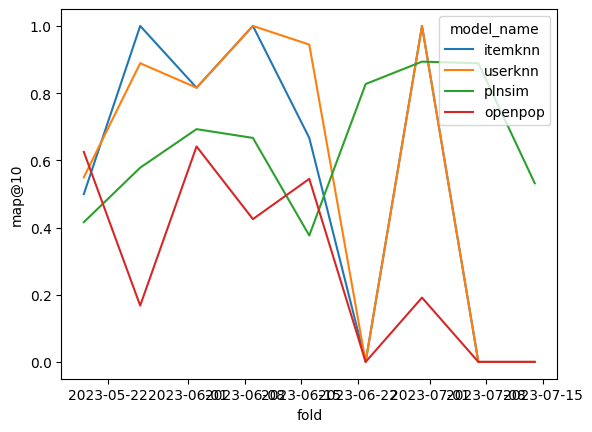

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2023-05-12,1,7d,2023-05-12,0.007597,0.006988,1,1.0,1.0,1.000000,0.333333,0.200000,0.100000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.128402
2023-05-19,7,7d,2023-05-19,0.000921,0.006870,11,5.0,9.8,0.600000,0.466667,0.520000,0.520000,...,0.874675,1.0,1.0,0.411255,0.361688,0.512338,0.660390,0.678571,0.678571,0.128297
2023-05-26,6,7d,2023-05-26,0.015302,0.004732,4,4.0,4.0,1.000000,0.777778,0.533333,0.266667,...,1.000000,1.0,1.0,0.416667,0.916667,1.000000,1.000000,1.000000,1.000000,0.127317
2023-06-02,3,7d,2023-06-02,0.001285,0.007715,7,7.0,7.0,0.833333,0.722222,0.700000,0.516667,...,1.000000,1.0,1.0,0.228571,0.432540,0.660714,0.791667,0.791667,0.791667,0.128269
2023-06-09,6,90d,2023-06-09,0.005460,0.018151,1,1.0,1.0,1.000000,0.333333,0.200000,0.100000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121313
2023-06-16,15,7d,2023-06-16,0.004799,0.003032,2,2.0,2.0,1.000000,0.500000,0.300000,0.150000,...,1.000000,1.0,1.0,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.126620
2023-06-23,3,14d,2023-06-23,0.000958,0.001617,0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092661
2023-06-30,8,10YE,2023-06-30,0.039698,0.026012,1,1.0,1.0,1.000000,0.333333,0.200000,0.100000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121601
2023-07-07,7,7d,2023-07-07,0.000896,0.000794,0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070504
